In [1]:
# create a 1D model for predicting lithologic makeup of a mixed sed sample after abrading downstream

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# for starters, just lose some mass to abrasion at each time step. Don't worry about actual stream mechanics.
# think of this as how rocks of different lithologies would evolve if just sitting stationary in a stream

In [47]:
# initial masses of different lithologies

igneous = 100
metamorphic = 100
sedimentary = 100

# abrasion coefficients of different

beta_ig = 0.001
beta_mtm = 0.01
beta_sed = 0.05

In [48]:
for i in range(100):
    ig_amt_abraded = igneous * beta_ig
    igneous -= ig_amt_abraded
    
    mtm_amt_abraded = metamorphic * beta_mtm
    metamorphic -= mtm_amt_abraded
    
    sed_amt_abraded = sedimentary * beta_sed
    sedimentary -= sed_amt_abraded
    
    total_mass = igneous + metamorphic + sedimentary
    frac_ig = (igneous/total_mass) * 100
    frac_mtm = (metamorphic/total_mass) * 100
    frac_sed = (sedimentary/total_mass) * 100

In [49]:
frac_ig

70.8670983349021

In [50]:
frac_mtm

28.66918109923037

In [51]:
frac_sed

0.4637205658675365

In [52]:
# okay, that was quicker/easier than expected
# now think about what happens as these clasts move downstream (still don't worry about picking up new clasts)

# step after that will be to think about picking up new clasts if bed is always exposed
# then final step is to think about picking up new clasts if bed is partially covered

In [53]:
# when clasts move downstream, they interact with the bed
# so there are two sources of abrasion: interaction with bed + interaction with other clasts

In [68]:
# grid setup and elevation stuff
dx = 1
x = np.arange(0, 100 + dx, dx)
elev = np.zeros(len(x))
uplift_rate = 0.001

# initial lithology distribution
igneous = np.ones(len(x))
metamorphic = np.ones(len(x))
sedimentary = np.ones(len(x))

# sed flux
qs_ig = np.zeros(len(x))
qs_mtm = np.zeros(len(x))
qs_sed = np.zeros(len(x))
# qs_ig[0] = igneous
# qs_mtm[0] = metamorphic
# qs_sed[0] = sedimentary

# discharge
q = x

# c is fxn of grainsize, among other stuff. Lower for igneous rocks because they comprise the gravel fraction?
# or should c be the same for all?
c_ig = 0.001
c_mtm = 0.01
c_sed = 0.05

# timestep stuff
num_steps = 10000
dt = 0.2 * dx * dx / c_mtm  # time-step size

In [70]:
for i in range(num_steps):
    # adjust elevations and calc slope
    elev[:] += uplift_rate * dt
    S = -np.diff(elev) / dx
    
    # calc sed flux
    ig_attrition = igneous * beta_ig
    qs_ig = (q * S * c_ig) - ig_attrition
    igneous += qs_ig
    
    mtm_attrition = metamorphic * beta_mtm
    qs_mtm[1:] = (q * S * c_mtm) - mtm_attrition
    metamorphic += qs_mtm
    
    sed_attrition = sedimentary * beta_sed
    qs_sed[1:] = (q * S * c_sed) - sed_attrition
    sedimentary += qs_sed

ValueError: operands could not be broadcast together with shapes (101,) (100,) 

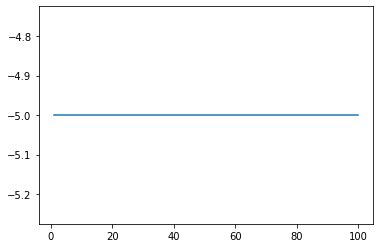

In [66]:
plt.plot(x[1:], qs_sed[1:])